# Bonanza-LTER Eight Mile Lake Dataset Cleaning

In [282]:
import pandas as pd
import numpy as np
import csv
import glob, os
from datetime import datetime

This script reads in multiple datasets from the Bonanza-LTER data catalog for thaw gradient sites at Eight Mile Lake (EML). 
The general workflow for each dataset is to:
import individual dataset, declare na_values, inspect the data, format date to datetime, and add corresponding year and day of year (DOY) columns if needed.

### Eight Mile Lake: CO2 Flux data 2004-2010
DOI: http://dx.doi.org/10.6073/pasta/2f70f7a4a0279df6f2bfe7ecdf2462cd

In [283]:
EMLurl8="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/455_ThawGradientAK_CarbonFluxes_2004-2006.txt"
EMLurl9="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/455_ThawGradientAK_CarbonFluxes_2007-2010.txt"

Eight Mile Lake-Thaw Gradient Carbon Flux Datasets: 2004-2006, and 2007-2010. 
Variables include: air temperature (degC), PAR, NEE, ecosystem respiration (Re), and GPP

In [284]:
emlcf1 =pd.read_csv(EMLurl8
          ,skiprows=1
            ,sep=","  
           , names=[
                    "year",     
                    "month",     
                    "doy",     
                    "hour",     
                    "chamb",     
                    "site",     
                    "tair",     
                    "PAR",     
                    "NEE",     
                    "Re",     
                    "GPP",     
                    "filled"    ],na_values={'-9999','NaN'})

In [285]:
emlcf2 =pd.read_csv(EMLurl9
          ,skiprows=1
            ,sep=","  
           , names=[
                    "year",     
                    "month",     
                    "doy",     
                    "hour",     
                    "chamb",     
                    "site",     
                    "tair",     
                    "PAR",     
                    "NEE",     
                    "Re",     
                    "GPP",     
                    "filled"    ],na_values={'-9999','NaN'})

In [286]:
emlcf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123308 entries, 0 to 123307
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    123308 non-null  int64  
 1   month   123308 non-null  int64  
 2   doy     123308 non-null  int64  
 3   hour    123308 non-null  int64  
 4   chamb   123209 non-null  float64
 5   site    123308 non-null  object 
 6   tair    123308 non-null  float64
 7   PAR     123308 non-null  float64
 8   NEE     89459 non-null   float64
 9   Re      122427 non-null  float64
 10  GPP     122774 non-null  float64
 11  filled  123308 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 11.3+ MB


<AxesSubplot:>

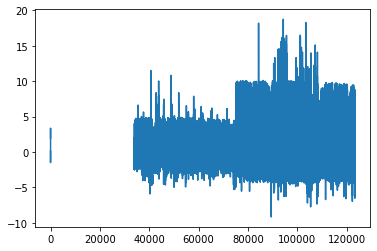

In [287]:
emlcf1.NEE.plot()

In [288]:
emlcf2.describe()

,year,month,doy,hour,chamb,tair,PAR,NEE,Re,GPP,filled
count,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330914.000000,241352.000000,330918.000000
mean,2008.797237,6.992282,197.148378,12.197593,17.984637,9.546084,303.363055,0.822493,-2.190732,4.131245,0.045395
std,1.167679,1.410592,44.122837,6.933175,10.377258,6.112107,355.918879,2.793848,1.005802,3.300454,0.208169
min,2007.000000,5.000000,121.000000,0.000000,1.000000,-40.005390,-0.130713,-11.671900,-11.790075,-9.210526,0.000000
25%,2008.000000,6.000000,159.000000,6.000000,9.000000,5.830000,2.658936,-1.258037,-2.753909,1.702345,0.000000
50%,2009.000000,7.000000,197.000000,12.000000,17.000000,9.676695,156.395750,0.154716,-2.053975,3.356724,0.000000
75%,2010.000000,8.000000,235.000000,18.000000,27.000000,13.740000,510.295800,2.423842,-1.474020,6.239087,0.000000
max,2010.000000,9.000000,274.000000,24.000000,35.000000,29.630000,1960.882000,19.102029,7.350334,22.779822,1.000000


<AxesSubplot:>

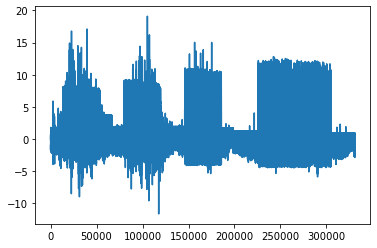

In [289]:
emlcf2.NEE.plot()

In [290]:
emlcfconcat=pd.concat([emlcf1,emlcf2])

Added a seperate Date column from Year and Doy 

In [291]:
emlcfconcat['date']=pd.to_datetime(emlcfconcat['year'] * 1000 + emlcfconcat['doy'], format='%Y%j')
emlcfconcat.head()

,year,month,doy,hour,chamb,site,tair,PAR,NEE,Re,GPP,filled,date
0,2004,5,128,12.0,1.0,Ext,1.1,500.0,0.10,NaN,NaN,0,2004-05-07
1,2004,5,128,12.0,3.0,Ext,1.1,500.0,-0.64,NaN,NaN,0,2004-05-07
2,2004,5,128,12.0,5.0,Ext,1.1,500.0,-0.55,NaN,NaN,0,2004-05-07
3,2004,5,128,12.0,7.0,Ext,1.1,500.0,-0.97,NaN,NaN,0,2004-05-07
4,2004,5,128,12.0,9.0,Ext,1.1,500.0,-1.50,NaN,NaN,0,2004-05-07


Merge datasets to create one continuous dataset

In [292]:
emlcfconcat.describe()

,year,month,doy,hour,chamb,tair,PAR,NEE,Re,GPP,filled
count,454226.000000,454226.000000,454226.000000,454226.000000,454127.000000,454226.000000,454226.000000,420377.000000,453341.000000,364126.000000,454226.000000
mean,2007.799901,7.038159,198.700781,12.027522,17.983632,10.344321,319.121766,0.847200,-2.246409,3.825618,0.281331
std,1.959896,1.304608,40.720324,6.926299,10.373240,6.153412,369.169179,2.736555,0.988841,3.225913,0.449649
min,2004.000000,4.000000,121.000000,0.000000,1.000000,-40.005390,-0.130713,-11.671900,-11.790075,-9.210526,0.000000
25%,2006.000000,6.000000,166.000000,6.000000,9.000000,6.500000,3.748500,-1.271722,-2.776215,1.318772,0.000000
50%,2008.000000,7.000000,199.000000,12.000000,17.000000,10.340000,171.264000,0.298639,-2.110811,3.284440,0.000000
75%,2010.000000,8.000000,232.000000,18.000000,27.000000,14.416510,533.453200,2.501742,-1.562408,5.803056,1.000000
max,2010.000000,9.000000,274.000000,24.000000,35.000000,37.222222,2350.000000,19.102029,7.350334,24.070000,1.000000


Visualize the data after the datasets have been merged..

<AxesSubplot:>

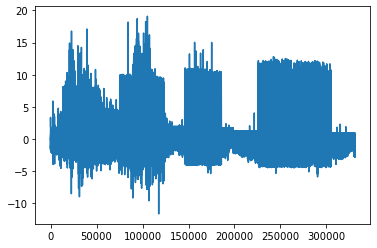

In [293]:
emlcfconcat.NEE.plot()

Export concatenated EML Carbon Flux datasets for years 2004-2010

In [294]:
emlcfconcat.index = emlcfconcat['date']
emlcfconcat.to_csv('AK_EML_CarbonFluxes_2004-2010.csv')

### Eight Mile Lake-Thaw Gradient: Physical properties of soil (temperature, moisure and thaw depth)
DOI: http://dx.doi.org/10.6073/pasta/6bffaf21fbd1d2704b37da01fbbca623

In [295]:
EMLurl2="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/534_footprint_alt_2008.txt"

Read in url link as csv file, state Na values and print dataset information

In [296]:
EMLdf2=pd.read_csv(EMLurl2,sep=',',na_values={'-9999','NaN'})
EMLdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   site          229 non-null    int64  
 1   northing      229 non-null    float64
 2   easting       229 non-null    float64
 3   ele           229 non-null    float64
 4   Date          229 non-null    object 
 5   Time          229 non-null    object 
 6   st_10         229 non-null    float64
 7   st_20         229 non-null    float64
 8   sm_10         229 non-null    float64
 9   millivolts    229 non-null    float64
 10  %VWC_10       229 non-null    float64
 11  sm_20         229 non-null    float64
 12  millivolts.1  229 non-null    float64
 13  %VWC_20       229 non-null    float64
 14  TD1           229 non-null    float64
 15  TD2           229 non-null    float64
 16  TD3           229 non-null    float64
 17  TD_avg        229 non-null    float64
dtypes: float64(15), int64(1), obje

In [297]:
EMLdf2.head()

,site,northing,easting,ele,Date,Time,st_10,st_20,sm_10,millivolts,%VWC_10,sm_20,millivolts.1,%VWC_20,TD1,TD2,TD3,TD_avg
0,1,7085394.513,389438.366,658.111,2008-01-08,16:09,2.7,1.7,54.4,18.4,16.5,40.6,24.6,26.3,35.5,40.0,36.3,37.27
1,2,7085395.139,389414.092,658.121,2008-03-08,12:10,3.9,2.8,41.8,23.9,25.2,32.4,30.9,36.1,43.6,35.0,40.1,39.57
2,3,7085394.427,389389.890,658.127,2008-03-08,12:19,2.8,2.1,53.3,18.8,17.1,37.8,26.5,29.2,36.2,34.0,38.2,36.13
3,4,7085396.670,389365.839,657.923,2008-03-08,17:34,8.4,4.8,54.1,18.5,16.7,41.2,24.3,25.7,38.0,44.9,40.6,41.17
4,5,7085398.731,389342.848,658.047,2008-03-08,17:43,6.4,3.1,38.6,25.9,28.3,31.3,31.9,37.8,31.9,36.9,40.3,36.37


format date into datetime format..
Combine date and time to create new DateTime column..
extract DOY and Year from Date 

In [298]:
EMLdf2['Date ']=pd.to_datetime(EMLdf2['Date '])
EMLdf2['Date '] = EMLdf2['Date '].dt.strftime('%Y-%d-%m')
EMLdf2['DateTime'] = pd.to_datetime(EMLdf2['Date '].apply(str)+' '+EMLdf2['Time '])
EMLdf2["Doy"]=EMLdf2['DateTime'].dt.dayofyear
EMLdf2["Year"]=EMLdf2['DateTime'].dt.year
EMLdf2=EMLdf2.rename(columns={"Date ": "Date",'Time ':'Time'})
EMLdf2.head()

,site,northing,easting,ele,Date,Time,st_10,st_20,sm_10,millivolts,...,sm_20,millivolts.1,%VWC_20,TD1,TD2,TD3,TD_avg,DateTime,Doy,Year
0,1,7085394.513,389438.366,658.111,2008-08-01,16:09,2.7,1.7,54.4,18.4,...,40.6,24.6,26.3,35.5,40.0,36.3,37.27,2008-08-01 16:09:00,214,2008
1,2,7085395.139,389414.092,658.121,2008-08-03,12:10,3.9,2.8,41.8,23.9,...,32.4,30.9,36.1,43.6,35.0,40.1,39.57,2008-08-03 12:10:00,216,2008
2,3,7085394.427,389389.890,658.127,2008-08-03,12:19,2.8,2.1,53.3,18.8,...,37.8,26.5,29.2,36.2,34.0,38.2,36.13,2008-08-03 12:19:00,216,2008
3,4,7085396.670,389365.839,657.923,2008-08-03,17:34,8.4,4.8,54.1,18.5,...,41.2,24.3,25.7,38.0,44.9,40.6,41.17,2008-08-03 17:34:00,216,2008
4,5,7085398.731,389342.848,658.047,2008-08-03,17:43,6.4,3.1,38.6,25.9,...,31.3,31.9,37.8,31.9,36.9,40.3,36.37,2008-08-03 17:43:00,216,2008


Plot out variables to visualize the data..

<AxesSubplot:>

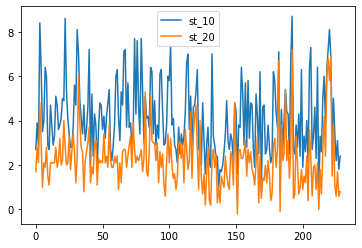

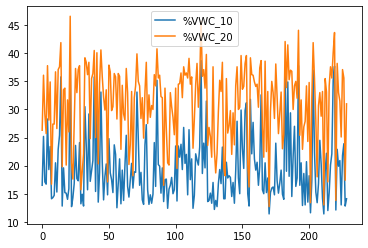

In [299]:
EMLdf2[['st_10','st_20']].plot(legend=True)
EMLdf2[['%VWC_10','%VWC_20']].plot(legend=True)

Set date as index to remove row number index..export to csv when done

In [300]:
EMLdf2.index = EMLdf2['Date']
EMLdf2.to_csv('ak_eml_bnzlter_soilproperties_2008.csv')

### Eight Mile Lake: Eddy covariance CO2 flux data
DOI: http://dx.doi.org/10.6073/pasta/a566c09857cfce4882509555661a1447

Read in csv data from url link and print dataset info

In [301]:
EMLurl3="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/447_healy_EC_gapfilled_09.txt"
EMLdf3=pd.read_csv(EMLurl3)

EMLdf3.info()

Unnamed Columns appear to be empty, remove from dataset..

In [302]:
EMLdf3=EMLdf3.drop(columns=['Unnamed: 16', 'Unnamed: 22','Unnamed: 19']) #remove two unnamed columns which contain all null values

In [303]:
#Re-format Date to match that of other datasets: Year, Month, Day
EMLdf3['Date']= pd.to_datetime(EMLdf3[['Year','Month','Day']],format='%Y-%m-%d')
EMLdf3["Doy"]=EMLdf3['Date'].dt.dayofyear
EMLdf3.head()

,Year,Month,Day,time,week,PPFD,netrad,TA,TA K,Ts,...,Calculated NEE,Calculated Re,gapfilled reco,gapfilled NEE,GEP,NEE g Cm-2,GEP g Cm-2,Re g Cm-2,Date,Doy
0,2009,3,24,0.0,12,0.0,-38.20696,-17.75414,255.4,-8.09,...,0.568647,0.568647,1.329369,1.329369,0.0,0.028738,0.0,0.028738,2009-03-24,83
1,2009,3,24,0.5,12,0.0,-37.47469,-18.47527,254.7,-8.08,...,0.569272,0.569272,1.318850,1.318850,0.0,0.028511,0.0,0.028511,2009-03-24,83
2,2009,3,24,1.0,12,0.0,-38.34639,-18.50944,254.6,-8.08,...,0.569272,0.569272,1.861610,1.861610,0.0,0.040244,0.0,0.040244,2009-03-24,83
3,2009,3,24,1.5,12,0.0,-37.35448,-19.57649,253.6,-8.07,...,0.569898,0.569898,0.569898,0.569898,0.0,0.012320,0.0,0.012320,2009-03-24,83
4,2009,3,24,2.0,12,0.0,-37.38875,-19.30055,253.8,-8.07,...,0.569898,0.569898,1.484271,1.484271,0.0,0.032087,0.0,0.032087,2009-03-24,83


Visualize NEE, GEP, and ecosystem respiration

<AxesSubplot:>

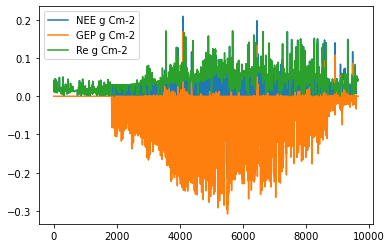

In [304]:
EMLdf3[['NEE g Cm-2','GEP g Cm-2','Re g Cm-2']].plot()


<AxesSubplot:>

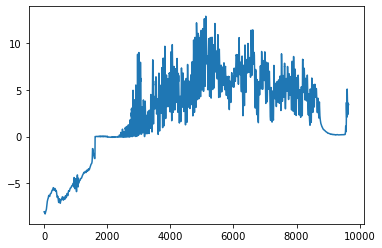

In [305]:
EMLdf3.Ts.plot()

When ready to export as a csv

In [306]:
EMLdf3.index = EMLdf3['Date']
EMLdf3.to_csv('ak_healy_bnzlter_eddycovariance_2009.csv')

### Thaw Gradient: Eight Mile Lake soil carbon and nitrogen 2004
DOI: http://dx.doi.org/10.6073/pasta/31b32868ddbb099c4b5480fb00eb2481

In [307]:

EMLurl4="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/366_Healy_Soil_C_and_N_inventory.txt"
EMLdf4=pd.read_csv(EMLurl4,na_values={'-9999','NaN'})

In [308]:
EMLdf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Site         159 non-null    object 
 1   Core         159 non-null    int64  
 2   O or M       159 non-null    object 
 3   Layer        159 non-null    object 
 4   Depth        159 non-null    float64
 5   %N           153 non-null    float64
 6   %C           153 non-null    float64
 7   delta14N     153 non-null    float64
 8   delta13C     153 non-null    float64
 9   gN/m2        153 non-null    float64
 10  gC/m2        153 non-null    float64
 11  BulkDensity  153 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 15.0+ KB


In [309]:
EMLdf4=EMLdf4.rename(columns={'%N':'Nitrogen','%C':'Carbon'})
EMLdf4.head()

,Site,Core,O or M,Layer,Depth,Nitrogen,Carbon,delta14N,delta13C,gN/m2,gC/m2,BulkDensity
0,Mod,1,O,0-5,5.0,0.70,43.57,-4.32,-27.79,22.50,1408.64,0.0647
1,Mod,1,O,5-15,10.0,0.76,42.97,-1.40,-26.45,49.58,2792.39,0.0650
2,Mod,1,O,15-25,10.0,1.41,40.05,0.89,-25.28,187.77,4959.11,0.1238
3,Mod,1,O,25-35,10.0,1.87,41.95,1.53,-25.51,307.90,6900.06,0.1645
4,Mod,1,O,35+,5.0,1.55,33.93,1.09,-26.66,190.13,4156.86,0.2450


Visualize Nitrogen and Carbon variables

<AxesSubplot:>

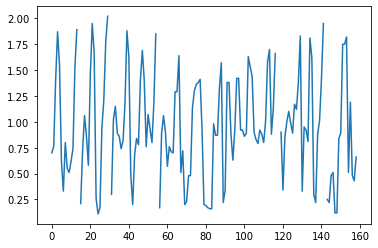

In [310]:
EMLdf4.Nitrogen.plot()

<AxesSubplot:>

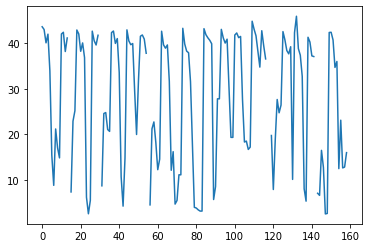

In [311]:
EMLdf4.Carbon.plot()

<AxesSubplot:>

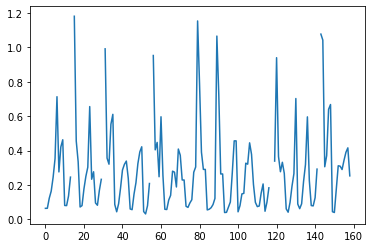

In [312]:
EMLdf4.BulkDensity.plot()

When ready to export

In [313]:
EMLdf4.index = EMLdf4['Site']
EMLdf4.to_csv('ak_healy_soil_C_and_N_inventory.csv')

### Eight Mile Lake Research Watershed, Thaw Gradient: Growing season CO2 fluxes and several ecosystem measurements
DOI: http://dx.doi.org/10.6073/pasta/d96e0aa67603035457276b021109cd25

In [314]:

EMLurl5="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/428_EMLfluxes.txt"

EMLdf5=pd.read_csv(EMLurl5,na_values={'-9999','NaN'})

In [315]:
EMLdf5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Site     150 non-null    object 
 1   Reco     150 non-null    float64
 2   NEE      149 non-null    float64
 3   GPP      150 non-null    float64
 4   MT       136 non-null    float64
 5   NDVI     149 non-null    float64
 6   TD       150 non-null    float64
 7   VWC      150 non-null    float64
 8   T        150 non-null    float64
 9   Biomass  150 non-null    float64
dtypes: float64(9), object(1)
memory usage: 11.8+ KB


Rename ecosystem respiration column from Reco to Re to match previous datasets

In [316]:
EMLdf5=EMLdf5.rename(columns={'Reco':'Re'})
EMLdf5.head()

,Site,Re,NEE,GPP,MT,NDVI,TD,VWC,T,Biomass
0,Min01,1.004,1.502,2.507,-0.72,0.741,38.6,0.27,2.60,236.4
1,Min02,1.717,2.140,3.859,-0.72,0.765,47.7,0.27,1.61,155.1
2,Min03,2.370,2.538,4.910,0.06,0.702,35.7,0.15,3.15,629.6
3,Min04,2.071,2.092,4.165,-0.31,0.710,35.0,0.17,5.89,379.6
4,Min05,2.443,1.466,3.911,-0.26,0.757,37.4,0.20,3.22,634.7


Visualize the data

<AxesSubplot:>

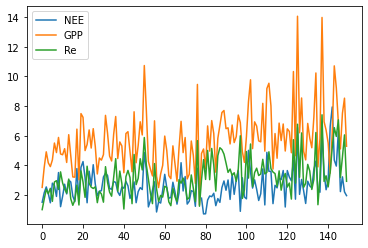

In [317]:
EMLdf5[['NEE','GPP','Re']].plot(legend=True)

<AxesSubplot:>

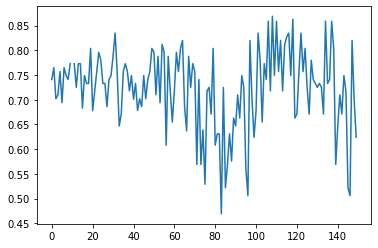

In [318]:
EMLdf5.NDVI.plot()

In [319]:
##### When ready to export
EMLdf5.index = EMLdf5['Site']
EMLdf5.to_csv('ak_eml_bnzlter_flux.csv')

### Eight Mile Lake: Peak growing season biomass 2017
DOI: http://dx.doi.org/10.6073/pasta/40f9ae60d635e5aac0e562ee006d24e2

In [320]:
EMLurl6="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/705_EML_AK_Gradient_BiomassBySpecies_2017.csv"
EMLdf6=pd.read_csv(EMLurl6,na_values={'-9999','NaN'})



In [321]:
EMLdf6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     288 non-null    object 
 1   site     288 non-null    object 
 2   plot     288 non-null    int64  
 3   species  288 non-null    object 
 4   avghits  288 non-null    float64
 5   biomass  288 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.6+ KB


Extract month, year and day of year from date index

In [322]:
EMLdf6['month']=pd.DatetimeIndex(EMLdf6['date']).month
EMLdf6['year']=pd.DatetimeIndex(EMLdf6['date']).year
EMLdf6['doy']=pd.DatetimeIndex(EMLdf6['date']).dayofyear
EMLdf6.head()

,date,site,plot,species,avghits,biomass,month,year,doy
0,2017-07-27,Extensive Thaw,1,AND,0.0000,0.000000,7,2017,208
1,2017-07-27,Extensive Thaw,1,AUL,0.0000,0.000000,7,2017,208
2,2017-07-27,Extensive Thaw,1,BN,0.0000,0.000000,7,2017,208
3,2017-07-27,Extensive Thaw,1,CX,0.1875,14.953125,7,2017,208
4,2017-07-27,Extensive Thaw,1,DIC,0.0000,0.000000,7,2017,208


Visualize the data

<AxesSubplot:>

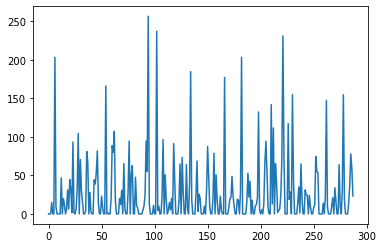

In [323]:
EMLdf6.biomass.plot()

Export to csv 

In [324]:
EMLdf6.index = EMLdf6['site']
EMLdf6.to_csv('ak_eml_bnzlter_biomass_2017.csv')

### Eight Mile Lake: Leaf Carbon, Nitrogen, Peak Biomass 2017
DOI: http://dx.doi.org/10.6073/pasta/f8a89e7b8545105b6aeff28449411d80

In [325]:
EMLurl7="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/706_EML_AK_Gradient_Foliar_C,N,P,Ca,Mg,SLA_Peak_2017.csv"
EMLdf7=pd.read_csv(EMLurl7,na_values={'-9999','NaN'})



In [326]:
EMLdf7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     126 non-null    object 
 1   site     126 non-null    object 
 2   base     126 non-null    int64  
 3   species  126 non-null    object 
 4   SLA      125 non-null    float64
 5   %C       126 non-null    float64
 6   d13C     126 non-null    float64
 7   %N       126 non-null    float64
 8   d15N     126 non-null    float64
 9   %P       124 non-null    float64
 10  %Ca      124 non-null    float64
 11  %Mg      124 non-null    float64
 12  notes    3 non-null      object 
dtypes: float64(8), int64(1), object(4)
memory usage: 12.9+ KB


Extract month, day of year and year from date index

In [327]:
EMLdf7['month']=pd.DatetimeIndex(EMLdf7['date']).month
EMLdf7['year']=pd.DatetimeIndex(EMLdf7['date']).year
EMLdf7['doy']=pd.DatetimeIndex(EMLdf7['date']).dayofyear

EMLdf7=EMLdf7.rename(columns={'%N':'Nitrogen','%C':'Carbon'})
EMLdf7.head()

,date,site,base,species,SLA,Carbon,d13C,Nitrogen,d15N,%P,%Ca,%Mg,notes,month,year,doy
0,2017-07-17,Extensive Thaw,1,VVI,77.76,49.599,-27.399,1.446,-8.155,0.169,0.25,0.11,NaN,7,2017,198
1,2017-07-17,Extensive Thaw,1,RO,68.12,53.640,-27.003,1.778,-5.952,0.165,0.23,0.10,NaN,7,2017,198
2,2017-07-17,Extensive Thaw,1,CX,110.07,45.799,-25.907,2.498,1.694,0.159,0.14,0.12,NaN,7,2017,198
3,2017-07-17,Extensive Thaw,1,BN,114.95,48.794,-29.786,2.013,-7.796,0.230,0.35,0.16,NaN,7,2017,198
4,2017-07-17,Extensive Thaw,1,EV,72.51,46.560,-26.595,2.100,1.648,0.196,0.06,0.09,NaN,7,2017,198


Eight Mile Lake-Thaw Gradient Foliar Carbon and Nitrogen 2017

<AxesSubplot:>

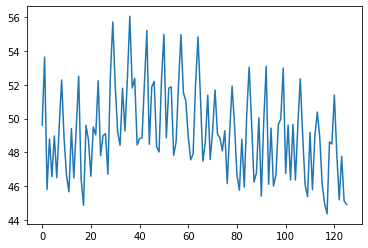

In [328]:
EMLdf7.Carbon.plot()

<AxesSubplot:>

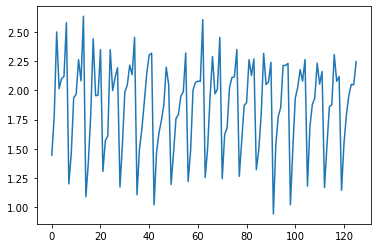

In [329]:
EMLdf7.Nitrogen.plot()

Export to csv

In [330]:
EMLdf7.index = EMLdf7['site']
EMLdf7.to_csv('ak_eml_bnzlter_foliar_c_n_2017.csv')

### Eight Mile Lake: PLant Species Composition and Productivity 2004
DOI: http://dx.doi.org/10.6073/pasta/141d911e791ee2c2903884f8719f5a3e

In [331]:
EMLurl10="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/348_Healy04_BiomassNPP.txt"
EMLdf10=pd.read_csv(EMLurl10,na_values={'-9999','NaN'})


In [332]:
EMLdf10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Site                      612 non-null    object 
 1   Ch                        612 non-null    int64  
 2   Species/Fxn Group/ Total  612 non-null    object 
 3   Fxn Grp                   612 non-null    object 
 4   g/m2 all                  612 non-null    float64
 5   g/m2 lf                   612 non-null    float64
 6   g/m2 NPP                  576 non-null    float64
 7   % AG                      288 non-null    float64
 8   %PS                       288 non-null    float64
 9   delta 15N                 121 non-null    float64
 10  delta 13C                 121 non-null    float64
 11  %N                        121 non-null    float64
 12  %C                        120 non-null    object 
dtypes: float64(8), int64(1), object(4)
memory usage: 62.3+ KB


In [333]:
#appears %Carbon and %Nitrogen have a lot of missing values within the dataset

<AxesSubplot:>

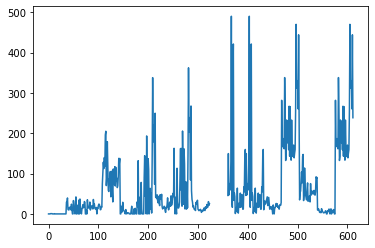

In [334]:
EMLdf10['g/m2 NPP'].plot()

In [335]:
EMLdf10.index = EMLdf10['Site']
EMLdf10.to_csv('ak_healy_bnzlter_biomass.csv')

### Eight Mile Lake: Active Layer Thickness 2004-2013
DOI: http://dx.doi.org/10.6073/pasta/03441a0ad26b370b8fd6000459fdf0bf

Merge two datasets to create one continuous file containing active layer thickness data from 2004-2013

In [336]:
EMLurl11="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/518_ActiveLayerDepth.csv"
EMLdf11=pd.read_csv(EMLurl11,na_values={'-9999','NaN'})


In [337]:
EMLdf11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Site    540 non-null    object 
 1   month   540 non-null    int64  
 2   day     540 non-null    int64  
 3   Year    540 non-null    int64  
 4   DOY     540 non-null    int64  
 5   Base    540 non-null    int64  
 6   ALD     540 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 29.7+ KB


In [338]:
EMLdf11['Date']= pd.to_datetime(EMLdf11[['Year','month','day']],format='%Y-%m-%d')
EMLdf11.head()

,Site,month,day,Year,DOY,Base,ALD,Date
0,Extensive,9,1,2004,244,1,69.0,2004-09-01
1,Extensive,9,1,2004,244,2,47.0,2004-09-01
2,Extensive,9,1,2004,244,3,58.0,2004-09-01
3,Extensive,9,1,2004,244,4,54.0,2004-09-01
4,Extensive,9,1,2004,244,5,53.0,2004-09-01


In [339]:
EMLdf11['Site'].unique()

array(['Extensive', 'Moderate', 'Minimal'], dtype=object)

<AxesSubplot:>

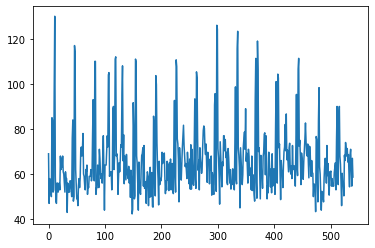

In [340]:
EMLdf11.ALD.plot()

In [341]:
EMLdf11['Date'].max()

Timestamp('2012-09-17 00:00:00')

In [342]:
EMLdf11.index = EMLdf11['Date']
EMLdf11.to_csv('ak_eml_bnzlter_ald_2004.csv')

In [343]:
EMLurl12="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/518_EML_ALD_2013.txt"
EMLdf12=pd.read_csv(EMLurl12,na_values={'-9999','NaN'})


In [344]:
EMLdf12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Site    36 non-null     object 
 1   month   36 non-null     int64  
 2   day     36 non-null     int64  
 3   Year    36 non-null     int64  
 4   DOY     36 non-null     int64  
 5   Base    36 non-null     int64  
 6   ALD     36 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 2.1+ KB


In [345]:
EMLdf12['Date']= pd.to_datetime(EMLdf12[['Year','month','day']],format='%Y-%m-%d')
EMLdf12['Site']=EMLdf12['Site'].replace({'extensive':'Extensive','minimal':'Minimal'
                                ,'moderate':'Moderate'})
EMLdf12.head()

,Site,month,day,Year,DOY,Base,ALD,Date
0,Extensive,9,20,2013,263,1,62.0,2013-09-20
1,Extensive,9,20,2013,263,2,56.0,2013-09-20
2,Extensive,9,20,2013,263,3,63.3,2013-09-20
3,Extensive,9,20,2013,263,4,68.7,2013-09-20
4,Extensive,9,20,2013,263,5,69.5,2013-09-20


<AxesSubplot:>

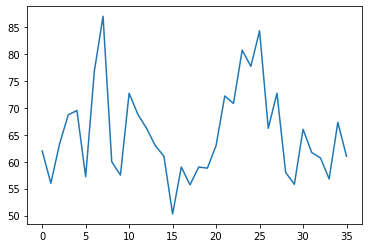

In [346]:
EMLdf12.ALD.plot()

Merge both datasets to create one continuous file

In [347]:
EMLald=pd.concat([EMLdf11,EMLdf12])
EMLald.Year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

In [348]:
#EMLald.index = EMLald['Date']
#EMLald.to_csv('ak_eml_bnzlter_ald_2004_2013.csv')

### Eight Mile Lake: Organic Layer Depth, NDVI
DOI: http://dx.doi.org/10.6073/pasta/9ef6520787d5cb17e5e753602c6277d2

In [349]:
EMLurl13="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/537_RS_alt_data.txt"
EMLdf13=pd.read_csv(EMLurl13,na_values={'-9999','NaN'})

In [350]:
EMLdf13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site                       77 non-null     object 
 1   land cover classification  77 non-null     object 
 2   TD_avg                     77 non-null     float64
 3   OD1                        77 non-null     float64
 4   OD2                        77 non-null     float64
 5   OD3                        77 non-null     int64  
 6   OD_avg                     77 non-null     float64
 7   OD_sd                      77 non-null     float64
 8   northing                   77 non-null     float64
 9   easting                    77 non-null     float64
 10  ele                        77 non-null     float64
 11  ndvi                       77 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 7.3+ KB


Visualize variable of interest..
EMLdf13_#_.plot()

<AxesSubplot:>

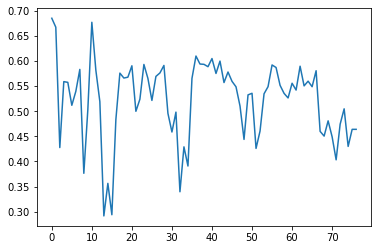

In [352]:
EMLdf13.ndvi.plot()

Export to csv..

In [ ]:
#EMLdf13.index = EMLdf13['Date']
#EMLdf13.to_csv('ak_eml_bnzlter_thaw_depth_2009.csv')

### Eight Mile Lake: Thaw Depths
DOI: http://dx.doi.org/10.6073/pasta/3deeaf33722575b6a9826bda6e3d21e6

In [353]:
EMLurl14="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/535_footprint_thawdepth_2009.txt"
EMLdf14=pd.read_csv(EMLurl14,na_values={'-9999','NaN'})

In [354]:
EMLdf14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      309 non-null    float64
 1   northing  309 non-null    float64
 2   easting   309 non-null    float64
 3   ele       309 non-null    float64
 4   td        309 non-null    float64
dtypes: float64(5)
memory usage: 12.2 KB


<AxesSubplot:>

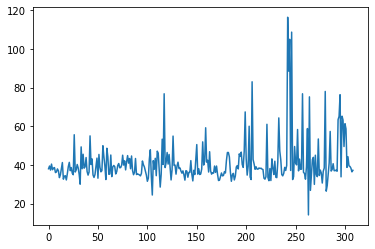

In [355]:
EMLdf14.td.plot()